In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from nonrad.nonrad import overlap_NM, analytic_overlap_NM, get_C

In [3]:
test_args = {
    'dQ': 2.008,
    'dE': 1.0102,
    'wi': 0.0306775211118,
    'wf': 0.0339920265573,
    'Wif': 0.00669174,
    'volume': 1.1e-21,
    'g': 1,
    'T': 300,
    'sigma': None,
    'overlap_method': 'analytic'
}

In [9]:
%timeit overlap_NM(test_args['dQ'], test_args['wi'], test_args['wf'], 1, 2)

281 µs ± 2.79 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [11]:
%timeit analytic_overlap_NM(test_args['dQ'], test_args['wi'], test_args['wf'], 1, 2)

54.8 µs ± 757 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [44]:
Ni, Nf = (40, 40)
overlaps = np.zeros((Ni, Nf, 3))
for m in range(Ni):
    for n in range(Nf):
        overlaps[m, n, 0] = overlap_NM(test_args['dQ'], test_args['wi'], test_args['wf'], m, n)
        overlaps[m, n, 1] = analytic_overlap_NM(test_args['dQ'], test_args['wi'], test_args['wf'], m, n)
        overlaps[m, n, 2] = np.abs(overlaps[m, n, 1] - overlaps[m, n, 0]) / np.abs(overlaps[m, n, 0])
        # print(m, n, overlaps[m, n, 0], overlaps[m, n, 1], overlaps[m, n, 2])

/home/mark/.virtualenvs/nonrad/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


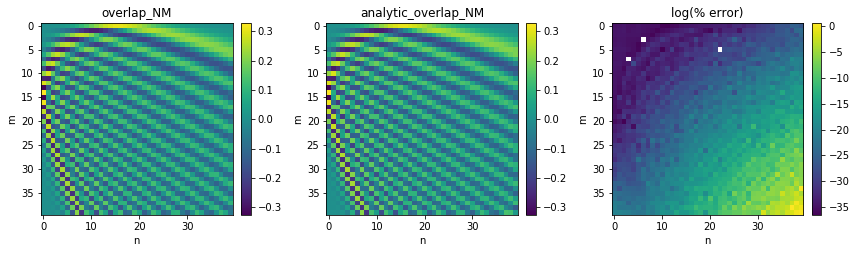

In [45]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
im0 = ax[0].imshow(overlaps[:, :, 0])
fig.colorbar(im0, ax=ax[0], fraction=0.046, pad=0.04)
ax[0].set_title('overlap_NM')
im1 = ax[1].imshow(overlaps[:, :, 1])
fig.colorbar(im1, ax=ax[1], fraction=0.046, pad=0.04)
ax[1].set_title('analytic_overlap_NM')
im2 = ax[2].imshow(np.log(overlaps[:, :, 2]))
fig.colorbar(im2, ax=ax[2], fraction=0.046, pad=0.04)
ax[2].set_title('log(% error)')
for a in ax:
    a.set_xlabel('n')
    a.set_ylabel('m')
plt.tight_layout()
plt.show()